# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        ##Convert temperatures from Kelvin to Celsius
        city_max_temp_celsius = city_max_temp - 273.15

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp_celsius,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chililabombwe
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | port-aux-francais


Processing Record 4 of Set 1 | gutao
Processing Record 5 of Set 1 | tolanaro
Processing Record 6 of Set 1 | camana
Processing Record 7 of Set 1 | long beach
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | sosnovo-ozerskoye
Processing Record 10 of Set 1 | kargasok
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | bouznika
Processing Record 14 of Set 1 | saint-joseph
Processing Record 15 of Set 1 | saint-pierre
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | greenville
Processing Record 18 of Set 1 | qarauyl
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | santa helena de goias
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | stanley
Processing Record 23 of Set 1 | dryden
Processing Record 24 of Set 1 | plastun
Processing Record 25 of Set 1 | zhezqazghan
Processing Record 26 of Set 1 | margaret river
Processing Record 27 

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [45]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chililabombwe,-12.3648,27.8229,18.24,97,100,1.56,ZM,1702337054
1,adamstown,-25.0660,-130.1015,21.70,60,1,1.41,PN,1702337055
2,port-aux-francais,-49.3500,70.2167,5.73,98,99,10.77,TF,1702337055
3,gutao,37.2025,112.1781,-2.09,93,79,1.39,CN,1702337055
4,tolanaro,-25.0319,46.9987,25.04,94,20,3.09,MG,1702337055


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chililabombwe,-12.3648,27.8229,18.24,97,100,1.56,ZM,1702337054
1,adamstown,-25.0660,-130.1015,21.70,60,1,1.41,PN,1702337055
2,port-aux-francais,-49.3500,70.2167,5.73,98,99,10.77,TF,1702337055
3,gutao,37.2025,112.1781,-2.09,93,79,1.39,CN,1702337055
4,tolanaro,-25.0319,46.9987,25.04,94,20,3.09,MG,1702337055


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

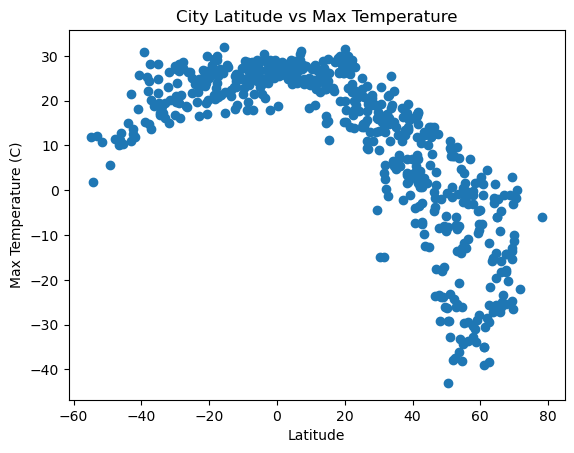

In [48]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

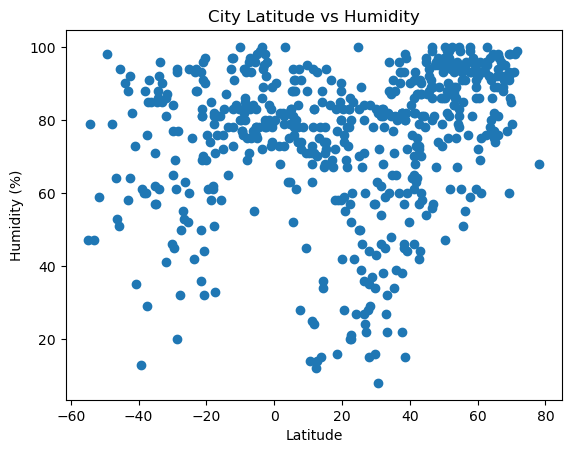

In [49]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

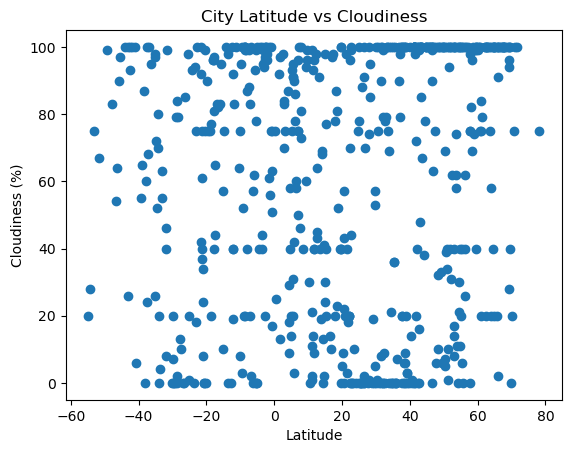

In [50]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

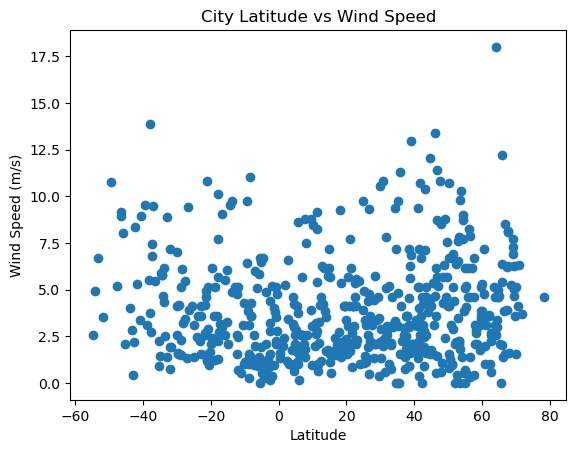

In [51]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,gutao,37.2025,112.1781,-2.09,93,79,1.39,CN,1702337055
6,long beach,33.7670,-118.1892,25.54,60,0,3.09,US,1702337055
7,aasiaat,68.7098,-52.8699,-1.00,77,100,5.26,GL,1702337055
8,sosnovo-ozerskoye,52.5249,111.5418,-37.35,100,62,0.41,RU,1702337056
9,kargasok,59.0556,80.8572,-28.91,93,74,3.13,RU,1702337056


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chililabombwe,-12.3648,27.8229,18.24,97,100,1.56,ZM,1702337054
1,adamstown,-25.0660,-130.1015,21.70,60,1,1.41,PN,1702337055
2,port-aux-francais,-49.3500,70.2167,5.73,98,99,10.77,TF,1702337055
4,tolanaro,-25.0319,46.9987,25.04,94,20,3.09,MG,1702337055
5,camana,-16.6228,-72.7111,21.17,81,82,3.01,PE,1702337055


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6769970372216272
y = 0.25x +27.86


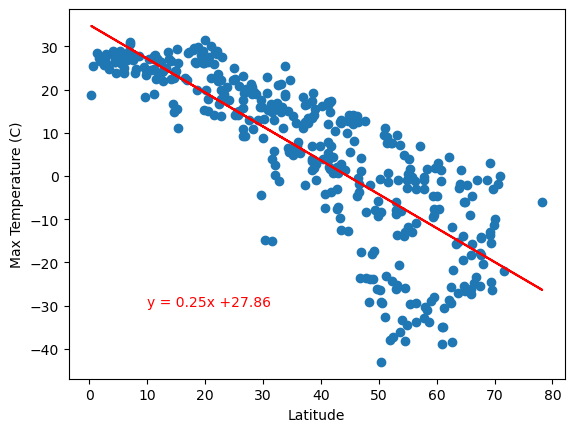

In [75]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.annotate(line_eq,(10,-30),fontsize=10,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r value & line equation string
print(f"The r-value is: {rvalue**2}")
print(line_eq)
# Show plot
plt.show()

The r-value is: 0.42420661722372666
y = -0.78x +34.99


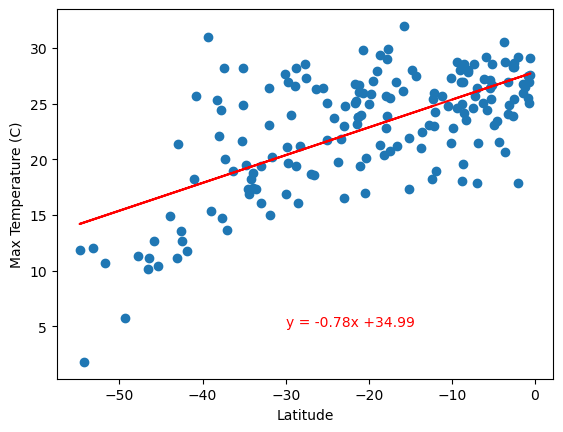

In [76]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.annotate(line_eq,(-30,5),fontsize=10,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r value & line equation string
print(f"The r-value is: {rvalue**2}")
print(line_eq)
# Show plot
plt.show()

**Discussion about the linear relationship:** The closer a city is to the equator (Latitude = 0), the higher the maximum temperature will be.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11839838902748379
y = 0.28x +66.01


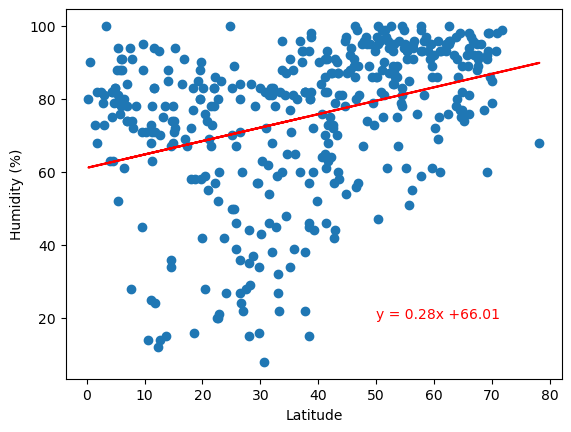

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(50,20),fontsize=10,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r value & line equation string
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Show plot
plt.show()

The r-value is: 0.11212682425790861
y = 0.37x +61.13


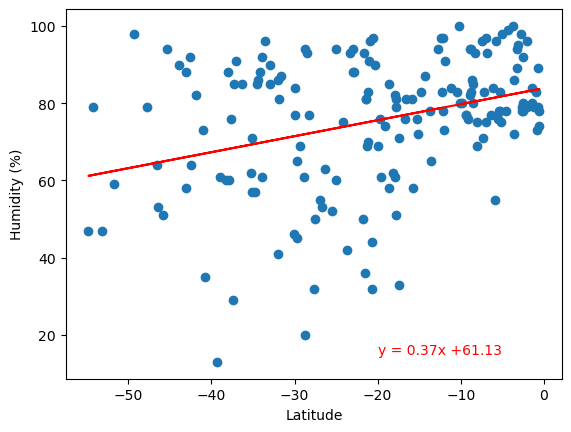

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-20,15),fontsize=10,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r value & line equation string
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Show plot
plt.show()

**Discussion about the linear relationship:** from what i can see here, it appears that in the southern hemisphere, humidity will gradually increase as you get closer to the equator. Humidity gradually increases as you pass the equator and continue to head north. We can surmise that the northern hemisphere has a higher percent humidity than the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05747319606862459
y = 0.41x +83.88


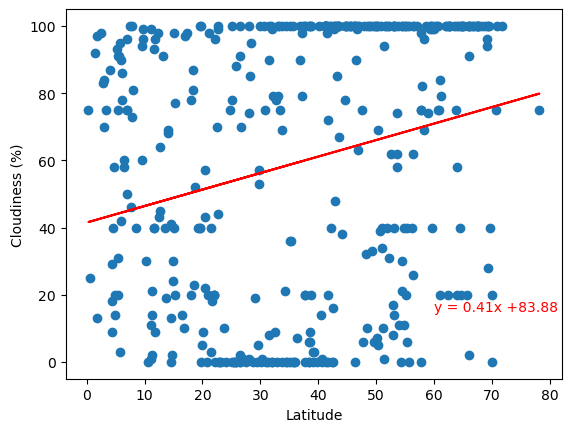

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(60,15),fontsize=10,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r value & line equation string
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Show plot
plt.show()

The r-value is: 0.011619462713093113
y = 0.49x +41.49


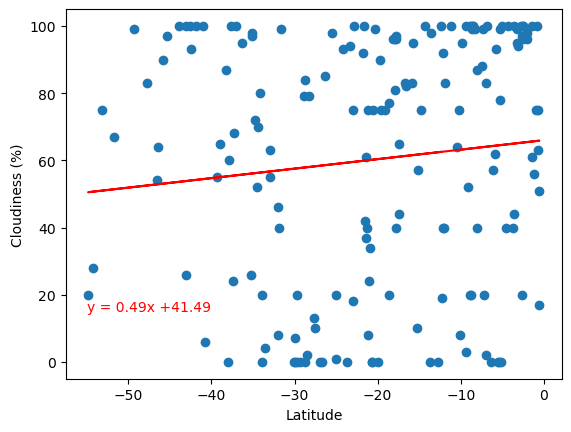

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-55,15),fontsize=10,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r value & line equation string
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.027285325124894635
y = 0.28x +66.01


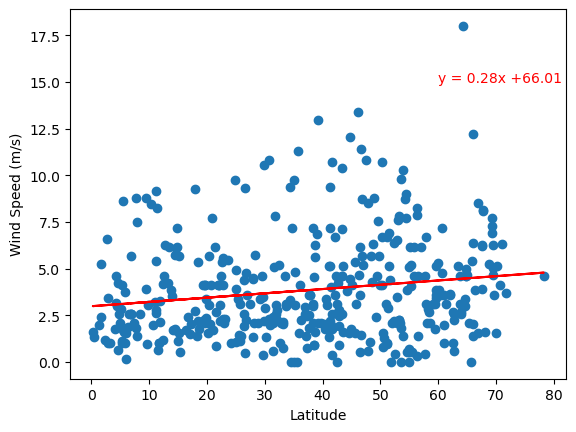

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq,(60,15),fontsize=10,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r value & line equation string
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Show plot
plt.show()

The r-value is: 0.09381635829259308
y = -0.06x +2.64


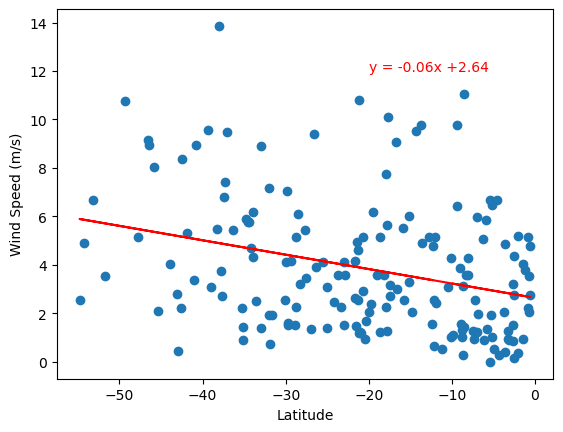

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq,(-20,12),fontsize=10,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Print r value & line equation string
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE